# Plot Smooth -vs- Not Smooth Depth Sensitivity

1. Check out sensitivities with smooth vs non smooth versions
2. Plot gradient check results for each

In [1]:
import os
import sys
import numpy as np
import xarray as xr
import xgcm
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt

from MITgcmutils import rdmds
import time

In [10]:
grid_dir = '/workspace/grids/pig_08'

ds = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08/diags',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)
ns = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08_notsmooth/diags',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)
ds_ad = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08/adj-dump',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)
ns_ad = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08_notsmooth/adj-dump',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)
ds_ctrl = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)
ns_ctrl = open_mdsdataset(data_dir='/workspace/ase-adjoint/pig/generic/run_ad_08_notsmooth',
                     grid_dir=grid_dir,
                     geometry='sphericalpolar',
                     ignore_unknown_vars=True)

/workspace/xmitgcm/xmitgcm/utils.py:429: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/workspace/xmitgcm/xmitgcm/mds_store.py:269: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


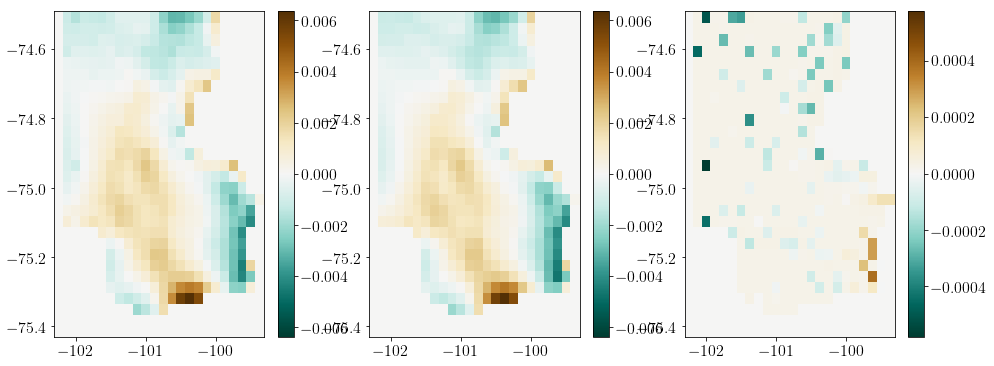

In [8]:
plt_vect = np.arange(0,len(ds.time),5)
for n in plt_vect:
    fig = plt.figure(figsize=(16,6))
    
    cmax = np.max(np.abs(ns.ETAN.isel(time=n).values))
    #cmax = 0.0005
    
    plt.subplot(1,3,1)
    plt.pcolormesh(ds.XC,ds.YC,ds.ETAN.isel(time=n),
                   vmin=-cmax,vmax = cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.pcolormesh(ds.XC,ds.YC,ns.ETAN.isel(time=n),
                   vmin=-cmax,vmax = cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    
    diff_fld = ds.ETAN.isel(time=n) - ns.ETAN.isel(time=n)
    cmax = np.max(np.abs(diff_fld.values))
    plt.subplot(1,3,3)
    plt.pcolormesh(ds.XC,ds.YC,diff_fld,
                   vmin=-cmax,vmax = cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    #if n == 0:
    #    plt.savefig('figures/smooth_hfac/eta_sm_ns_halfThreshold',dpi=300,bbox_inches='tight')
    #elif n == plt_vect[-1]:
    #    plt.savefig('figures/smooth_hfac/eta_sm_ns_halfThreshold_3days',dpi=300,bbox_inches='tight')
    plt.show()

## Reading in adxx_<> vars through xmitgcm

Right now, only have adjoint for `eta` `theta` and `salt` for testing
- need to sort through filename, prefix, vname ... for now, adxx_<> is everything but we want filename to be adxx_<> and prefix, but vname to show up as Eta_ad as specified in `variables.py` ... 
- added similar `filename` test in `load_from_prefix` as with grid variables, but maybe this is not necessary
- `adxx_etan` is only getting read in because it's added to the alias list, so that `adxx_etan`, which gets read in as prefix (and vname?) gets pointed to Eta_ad meta data ... 
- could make an `available_diagnostics.log` equivalent but for the control variables ... First should check out the package_state_variables in `variables.py` to see how those work
- this might help to sort out adjoint dump variables and control variables (e.g. if there are both in `data_dir`. 
- Finally, will need to sort out iteration numbers ... right now iter number in .meta is the optimization cycle not the iteration number. Then there are a bunch of records there  

In [9]:
fig = plt.figure(figsize=(16,6))

var = 'ADJetan'

fld = ds_ad[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,1)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()

fld = ns_ad[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,2)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()

fld = ns_ad[var].isel(time=0)-ds_ad[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,3)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()
plt.show()

In [12]:
fig = plt.figure(figsize=(16,6))

var = 'adxx_depth'

fld = ds_ctrl[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,1)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()

fld = ns_ctrl[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,2)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()

fld = ns_ctrl[var].isel(time=0)-ds_ctrl[var].isel(time=0)
cmax = np.max(np.abs(fld.values))
plt.subplot(1,3,3)
plt.pcolormesh(ds.XC,ds.YC,fld,
               cmap='BrBG_r',vmin=-cmax,vmax=cmax)
plt.colorbar()
plt.show()